In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

plt.rc('font', family='NanumBarunGothic') 

# 배경데이터

## 행정구역별 면적

In [50]:
# 인구밀도 데이터에서 행정구역별 면적만 추출
df_area = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1차프로젝트/data/인구밀도.csv',
                     header=1, skiprows = 1, usecols = [1,2,4], names=['자치구','동','km2'])
df_area = df_area.query('동=="소계"')
df_area.set_index('자치구', inplace=True)
df_area = df_area[['km2']]

In [20]:
df_area

,km2
자치구,
종로구,23.91
중구,9.96
용산구,21.87
성동구,16.86
광진구,17.06
동대문구,14.22
중랑구,18.50
성북구,24.58
강북구,23.60


## 범죄데이터

### 행정구역별 5년 평균 범죄 건수

In [51]:
df_cri = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/1차프로젝트/data/범죄.xlsx', 
                       usecols = ['자치구별(2)','2017','2018','2019','2020','2021'], 
                       skiprows = [1,2,3,4],
                       index_col='자치구별(2)')
df_cri.index.name = '자치구'
df_cri = df_cri.astype('int64')
df_cri['mean_crime'] = round(df_cri.mean(axis=1))

### 행정구역별 5년 기준 범죄 건수 변화

In [52]:
df_cri['crime_variation'] = df_cri['2021']-df_cri['2017']

In [53]:
df_cri

,2017,2018,2019,2020,2021,mean_crime,crime_variation
자치구,,,,,,,
종로구,4057,3690,3846,3102,2712,3481.0,-1345
중구,4184,4030,4327,3411,2861,3763.0,-1323
용산구,4060,3411,3313,2969,2381,3227.0,-1679
성동구,2767,2457,2512,2362,2112,2442.0,-655
광진구,4646,3915,4011,3601,3087,3852.0,-1559
동대문구,3975,3680,3692,3401,2959,3541.0,-1016
중랑구,4571,4288,4268,3726,3210,4013.0,-1361
성북구,3434,3042,2877,2567,2411,2866.0,-1023
강북구,3393,3437,3838,2770,2301,3148.0,-1092


<AxesSubplot:ylabel='Density'>

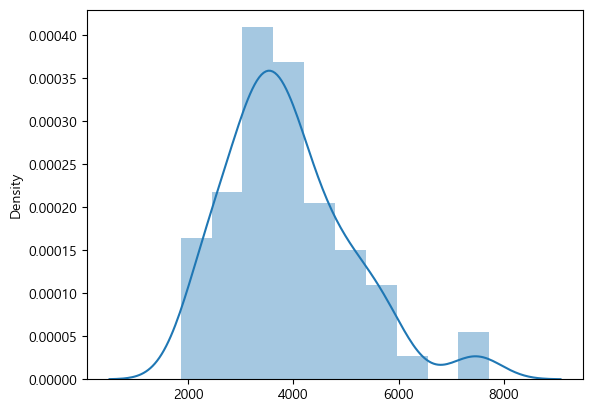

In [ ]:
sns.distplot(df_cri.iloc[:,:5])

In [26]:
#------------------------------------------------#
fig = px.bar(x = df_cri.index, y = df_cri.iloc[:,5])
fig.update_layout(
    title="자치구별 5년간 평균 범죄건수",
    xaxis_title="자치구",
    yaxis_title="범죄건수")

### ** 범죄 데이터 생성 및 삽입 

#### 평균 범죄건수/면적데이터, 범죄건수 변화/면적데이터

In [54]:
# 범죄 데이터 새로 만들기
df_crime = df_area.copy()

# 평균 범죄건수, 범죄건수 변화 삽입
df_crime.insert(1,'mean_crime',df_cri['mean_crime'])
df_crime.insert(2, 'crime_variation',df_cri['crime_variation'])

# 평균 범죄건수/면적데이터, 범죄건수 변화/면적데이터
df_crime['mean_crime/km2'] = round((df_crime['mean_crime']/df_crime['km2']),2)
df_crime['crime_variation/km2'] = round((df_crime['crime_variation']/df_crime['km2']),2)

In [55]:
df_crime

,km2,mean_crime,crime_variation,mean_crime/km2,crime_variation/km2
자치구,,,,,
종로구,23.91,3481.0,-1345,145.59,-56.25
중구,9.96,3763.0,-1323,377.81,-132.83
용산구,21.87,3227.0,-1679,147.55,-76.77
성동구,16.86,2442.0,-655,144.84,-38.85
광진구,17.06,3852.0,-1559,225.79,-91.38
동대문구,14.22,3541.0,-1016,249.02,-71.45
중랑구,18.50,4013.0,-1361,216.92,-73.57
성북구,24.58,2866.0,-1023,116.60,-41.62
강북구,23.60,3148.0,-1092,133.39,-46.27


#### 면적 대비 행정구역별 5년 평균 범죄수 순위 + 시각화

In [7]:
sort_crime = df_crime.iloc[:,[3]]
sort_crime.sort_values('mean_crime/km2',ascending=False,inplace=True)
sort_crime = sort_crime/100

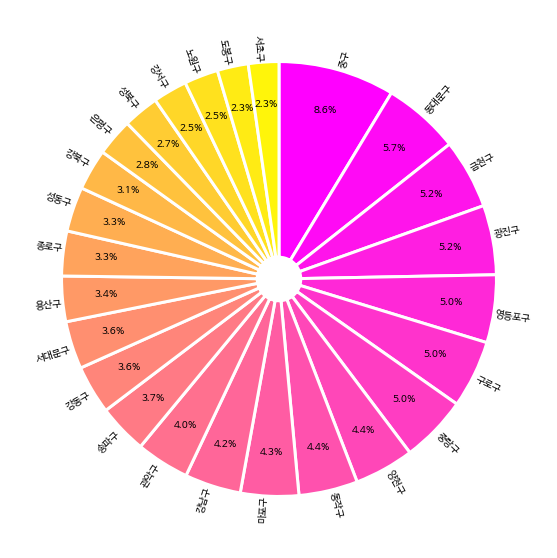

In [8]:
ratio = sort_crime['mean_crime/km2']
labels = sort_crime.index
wedgeprops={'width': 0.9, 'edgecolor': 'w', 'linewidth': 3}
theme = plt.get_cmap('spring')
color = [theme(1. * i / len(sort_crime.index)) for i in range(len(sort_crime.index))]

plt.figure(figsize=(10,10))
plt.pie(ratio, labels=labels, autopct='%.1f%%', pctdistance = 0.8, colors = color,
        startangle=90, counterclock=False, labeldistance= 1, rotatelabels=45, 
        wedgeprops=wedgeprops)

plt.show()

# CCTV

## cctv 수량 변화

In [56]:
df_cctv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1차프로젝트/data/CCTV설치운영현황.csv',header=1, usecols = [0,8,9,10,11,12])

# 데이터정제
df_cctv.drop(0,inplace=True)
df_cctv.iloc[1,0] = df_cctv.iloc[1,0].replace(' ','')
df_cctv.set_index('구분',inplace=True)
df_cctv.index.name = '자치구'
df_cctv = df_cctv.fillna(0)
df_cctv = df_cctv.astype(int)

# CCTV 추가 현황
df_cctv['cctv_variation'] = df_cctv.sum(axis=1)

df_cctv

,2017년,2018년,2019년,2020년,2021년,cctv_variation
자치구,,,,,,
종로구,261,85,9,200,0,555
중구,372,386,155,361,403,1677
용산구,351,125,307,617,228,1628
성동구,967,415,490,472,283,2627
광진구,675,465,712,175,655,2682
동대문구,814,201,218,223,219,1675
중랑구,153,174,1049,934,448,2758
성북구,890,867,714,253,404,3128
강북구,29,391,1078,656,470,2624


<AxesSubplot:ylabel='Density'>

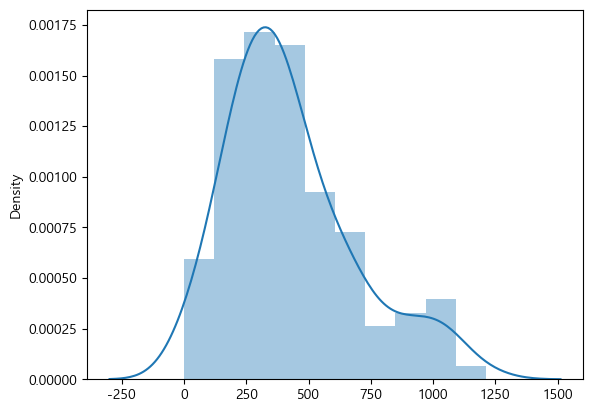

In [ ]:
sns.distplot(df_cctv.iloc[:,:5])

In [29]:
#-----------------------------------------------------#
fig = px.bar(x = df_cctv.index, y = 'cctv_variation', 
             data_frame = df_cctv)
fig.update_layout(
    title="자치구별 CCTV 추가",
    xaxis_title="자치구",
    yaxis_title="CCTV수")

## ** 범죄 데이터에 삽입

### cctv 수량 변화/면적

In [57]:
# 범죄데이터에 삽입
df_crime.insert(3,'cctv_variation', df_cctv['cctv_variation'])

# cctv 수량 변화 / 면적
df_crime['cctv_variation/km2'] = round((df_crime['cctv_variation']/df_crime['km2']),2)

In [58]:
df_crime

,km2,mean_crime,crime_variation,cctv_variation,mean_crime/km2,crime_variation/km2,cctv_variation/km2
자치구,,,,,,,
종로구,23.91,3481.0,-1345,555,145.59,-56.25,23.21
중구,9.96,3763.0,-1323,1677,377.81,-132.83,168.37
용산구,21.87,3227.0,-1679,1628,147.55,-76.77,74.44
성동구,16.86,2442.0,-655,2627,144.84,-38.85,155.81
광진구,17.06,3852.0,-1559,2682,225.79,-91.38,157.21
동대문구,14.22,3541.0,-1016,1675,249.02,-71.45,117.79
중랑구,18.50,4013.0,-1361,2758,216.92,-73.57,149.08
성북구,24.58,2866.0,-1023,3128,116.60,-41.62,127.26
강북구,23.60,3148.0,-1092,2624,133.39,-46.27,111.19


### 참고: 범죄건수, cctv건수 변화 시각화

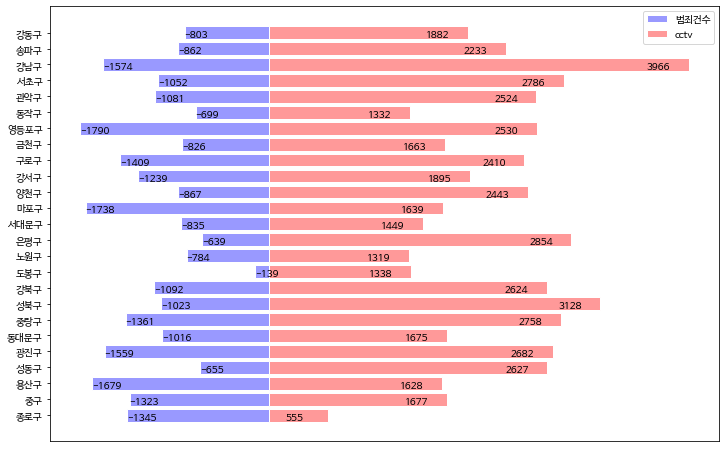

In [35]:
plt.figure(figsize = (12,8))

X = df_crime.index
Y1 = df_crime['crime_variation'].astype('float')
Y2 = df_crime['cctv_variation'].astype('float')

#plt.xticks(rotation=60)
plt.barh(X, Y1, facecolor='#9999ff', edgecolor='white', label='범죄건수')
plt.barh(X, Y2, facecolor='#ff9999', edgecolor='white', label = 'cctv')

for index, value in enumerate(Y1):
      plt.text(value, index-0.3, round(value))

for index, value in enumerate(Y2):
      plt.text(value-400, index-0.3, round(value))

plt.legend()
plt.gca().axes.xaxis.set_visible(False)
plt.show()

## ** 상관계수

In [67]:
df_crime.columns

Index(['km2', 'mean_crime', 'crime_variation', 'cctv_variation', 'bar_total',
       'mean_crime/km2', 'crime_variation/km2', 'cctv_variation/km2',
       'bar/km2'],
      dtype='object')

In [38]:
df_crime.iloc[:,[5,6]].corr()

,crime_variation/km2,cctv_variation/km2
crime_variation/km2,1.000000,-0.576841
cctv_variation/km2,-0.576841,1.000000


<AxesSubplot:xlabel='cctv_variation/km2', ylabel='crime_variation/km2'>

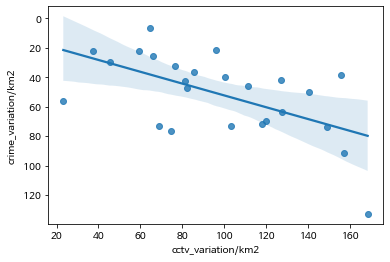

In [39]:
sns.regplot(x='cctv_variation/km2', y='crime_variation/km2', data=df_crime)

### 상관계수의 검정

In [40]:
X= df_crime['cctv_variation/km2']
y= df_crime['crime_variation/km2']

import scipy.stats as st

x = X.values
print('P-values: ',st.pearsonr(x,y)[1])

P-values:  0.0025391209512609296


# 유흥주점

## 유흥주점 수

In [59]:
df_bar = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/1차프로젝트/data/유흥주점.xlsx', 
                       usecols = [7,15])
df_bar = df_bar.query('상세영업상태명 == "영업"')
df_bar['자치구'] = df_bar['지번주소'].str.split(' ').str[1]
df_bar = df_bar.groupby('자치구').agg(bar_total = ('자치구', 'count'))

In [45]:
#-------------------------------------------------------------------#
fig = px.bar(x = df_bar.index, y = 'bar_total', data_frame = df_bar)
fig.update_layout(
    title="자치구별 유흥주점 현황",
    xaxis_title="자치구",
    yaxis_title="유흥주점 수")

## ** 범죄 데이터에 삽입

### 유흥주점 수 / 면적

In [60]:
# 범죄 데이터에 삽입
df_crime.insert(4,'bar_total', df_bar['bar_total'])

# 유흥주점 수 / 면적
df_crime['bar/km2'] = round((df_crime['bar_total']/df_crime['km2']),2)

In [61]:
df_crime

,km2,mean_crime,crime_variation,cctv_variation,bar_total,mean_crime/km2,crime_variation/km2,cctv_variation/km2,bar/km2
자치구,,,,,,,,,
종로구,23.91,3481.0,-1345,555,187,145.59,-56.25,23.21,7.82
중구,9.96,3763.0,-1323,1677,213,377.81,-132.83,168.37,21.39
용산구,21.87,3227.0,-1679,1628,23,147.55,-76.77,74.44,1.05
성동구,16.86,2442.0,-655,2627,22,144.84,-38.85,155.81,1.30
광진구,17.06,3852.0,-1559,2682,14,225.79,-91.38,157.21,0.82
동대문구,14.22,3541.0,-1016,1675,62,249.02,-71.45,117.79,4.36
중랑구,18.50,4013.0,-1361,2758,17,216.92,-73.57,149.08,0.92
성북구,24.58,2866.0,-1023,3128,8,116.60,-41.62,127.26,0.33
강북구,23.60,3148.0,-1092,2624,67,133.39,-46.27,111.19,2.84


## ** 상관계수

In [62]:
df_crime.columns

Index(['km2', 'mean_crime', 'crime_variation', 'cctv_variation', 'bar_total',
       'mean_crime/km2', 'crime_variation/km2', 'cctv_variation/km2',
       'bar/km2'],
      dtype='object')

In [63]:
df_crime.iloc[:,[5,8]].corr()

,mean_crime/km2,bar/km2
mean_crime/km2,1.000000,0.682636
bar/km2,0.682636,1.000000


<AxesSubplot:xlabel='bar/km2', ylabel='mean_crime/km2'>

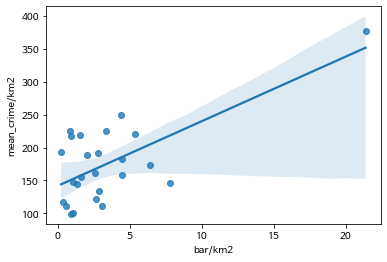

In [64]:
sns.regplot(x='bar/km2', y='mean_crime/km2', data=df_crime)

### 상관계수의 검정

In [65]:
X= df_crime['bar/km2']
y= df_crime['mean_crime/km2']

import scipy.stats as st

x = X.values
print('P-values: ',st.pearsonr(x,y)[1])

P-values:  0.00017014757657614113


# 최종결과
- CCTV 상관계수: -0.577
- 유흥주점 상관계수: 0.683

In [66]:
df_crime.to_csv('/content/drive/MyDrive/Colab Notebooks/1차프로젝트/make_df/df_crime.csv',index=False)

In [71]:
df_crime_f = df_crime.iloc[:,[5,8,6,7]]

df_crime_f.corr()

,mean_crime/km2,bar/km2,crime_variation/km2,cctv_variation/km2
mean_crime/km2,1.000000,0.682636,-0.870552,0.632820
bar/km2,0.682636,1.000000,-0.565046,0.189105
crime_variation/km2,-0.870552,-0.565046,1.000000,-0.576841
cctv_variation/km2,0.632820,0.189105,-0.576841,1.000000
